# 로지스틱 회귀

## 데이터 준비하기

In [6]:
import pandas as pd

df_fish = pd.read_csv('fish_basic.csv')
df_fish.head()

,Unnamed: 0,Species,Weight,Length
0,0,Bream,242.0,25.4
1,1,Bream,290.0,26.3
2,2,Bream,340.0,26.5
3,3,Bream,363.0,29.0
4,4,Bream,430.0,29.0


In [7]:
df_fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  159 non-null    int64  
 1   Species     159 non-null    object 
 2   Weight      159 non-null    float64
 3   Length      159 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 5.1+ KB


In [8]:
df_fish.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
df_fish.head(10)

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
5,Bream,450.0,29.7
6,Bream,500.0,29.7
7,Bream,390.0,30.0
8,Bream,450.0,30.0
9,Bream,500.0,30.7


In [12]:
df_fish_2 = pd.read_excel('fish_additional.xlsx')
df_fish_2.head()

,Unnamed: 0,Diagonal,Height,Width
0,0,30.0,11.5200,4.0200
1,1,31.2,12.4800,4.3056
2,2,31.1,12.3778,4.6961
3,3,33.5,12.7300,4.4555
4,4,34.0,12.4440,5.1340


In [13]:
df_fish_2.drop('Unnamed: 0', axis=1, inplace=True)
df_fish_2

,Diagonal,Height,Width
0,30.0,11.5200,4.0200
1,31.2,12.4800,4.3056
2,31.1,12.3778,4.6961
3,33.5,12.7300,4.4555
4,34.0,12.4440,5.1340
...,...,...,...
154,13.4,2.0904,1.3936
155,13.5,2.4300,1.2690
156,13.8,2.2770,1.2558
157,15.2,2.8728,2.0672


In [17]:
df_fish_total = pd.concat([df_fish, df_fish_2], axis=1)
df_fish_total.head(2)

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.52,4.0200
1,Bream,290.0,26.3,31.2,12.48,4.3056


In [31]:
df_fish_total.describe()

,Weight,Length,Diagonal,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,28.415723,31.227044,8.970994,4.417486
std,357.978317,10.716328,11.610246,4.286208,1.685804
min,0.000000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,63.400000,68.000000,18.957000,8.142000


In [23]:
fish_input = df_fish_total[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_input

array([[2.42000e+02, 2.54000e+01, 3.00000e+01, 1.15200e+01, 4.02000e+00],
       [2.90000e+02, 2.63000e+01, 3.12000e+01, 1.24800e+01, 4.30560e+00],
       [3.40000e+02, 2.65000e+01, 3.11000e+01, 1.23778e+01, 4.69610e+00],
       [3.63000e+02, 2.90000e+01, 3.35000e+01, 1.27300e+01, 4.45550e+00],
       [4.30000e+02, 2.90000e+01, 3.40000e+01, 1.24440e+01, 5.13400e+00],
       [4.50000e+02, 2.97000e+01, 3.47000e+01, 1.36024e+01, 4.92740e+00],
       [5.00000e+02, 2.97000e+01, 3.45000e+01, 1.41795e+01, 5.27850e+00],
       [3.90000e+02, 3.00000e+01, 3.50000e+01, 1.26700e+01, 4.69000e+00],
       [4.50000e+02, 3.00000e+01, 3.51000e+01, 1.40049e+01, 4.84380e+00],
       [5.00000e+02, 3.07000e+01, 3.62000e+01, 1.42266e+01, 4.95940e+00],
       [4.75000e+02, 3.10000e+01, 3.62000e+01, 1.42628e+01, 5.10420e+00],
       [5.00000e+02, 3.10000e+01, 3.62000e+01, 1.43714e+01, 4.81460e+00],
       [5.00000e+02, 3.15000e+01, 3.64000e+01, 1.37592e+01, 4.36800e+00],
       [3.40000e+02, 3.20000e+01, 3.73

In [25]:
fish_label = df_fish_total['Species'].to_numpy()
fish_label

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Whitefish',
       'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perc

In [26]:
set(fish_label)

{'Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'}

## 데이터셋 분류

In [30]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_label, test_label = train_test_split(fish_input, fish_label, random_state=42)

In [33]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

StandardScaler()

In [34]:
train_input_scaled = ss.transform(train_input)
train_input_scaled

array([[ 9.19657820e-01,  6.09431747e-01,  8.10412209e-01,
         1.85194896e+00,  1.00075672e+00],
       [ 3.00412188e-01,  1.54653445e+00,  1.45316551e+00,
        -4.69816625e-01,  2.72917446e-01],
       [-1.08585360e+00, -1.68646987e+00, -1.70848587e+00,
        -1.70159849e+00, -2.00447580e+00],
       [-7.97341433e-01, -6.08801762e-01, -6.74869070e-01,
        -8.24805885e-01, -2.76314705e-01],
       [-7.12898847e-01, -7.30625113e-01, -7.00926637e-01,
        -8.02298036e-02, -7.03386897e-01],
       [-9.12746301e-01, -9.64900787e-01, -9.52816444e-01,
        -8.80171862e-01, -9.91535662e-01],
       [-7.97341433e-01, -7.02512032e-01, -7.61727625e-01,
        -7.82824547e-01, -5.44530184e-01],
       [ 6.38182533e-01,  5.62576612e-01,  7.32239510e-01,
         1.64473401e+00,  5.07057367e-01],
       [-7.41046376e-01, -6.74398951e-01, -7.35670058e-01,
        -6.12059278e-01, -5.57331377e-01],
       [-8.67710255e-01, -7.96222301e-01, -8.92015456e-01,
        -9.33586942e-01

In [36]:
test_input_scaled = ss.transform(test_input)
test_input_scaled

array([[-0.88741352, -0.91804565, -1.03098914, -0.90464451, -0.80762518],
       [-1.06924656, -1.50842035, -1.54345461, -1.58849582, -1.93803151],
       [-0.54401367,  0.35641402,  0.30663259, -0.8135697 , -0.65388895],
       [-0.34698097, -0.23396068, -0.22320459, -0.11905019, -0.12233464],
       [-0.68475132, -0.51509149, -0.58801052, -0.8998784 , -0.50124996],
       [ 1.70778862,  0.79685229,  0.98412932,  2.49283113,  1.31347159],
       [-1.08726098, -1.67709884, -1.70848587, -1.76175528, -2.01154694],
       [-0.60030873, -0.3089289 , -0.29269143, -0.43855288, -0.33056738],
       [-0.57779071, -0.36515506, -0.44035097, -0.52577528, -0.17219833],
       [ 2.41147684,  2.57734741,  2.4694106 ,  0.45038962,  1.54627043],
       [ 0.72262512,  0.46886634,  0.64538096,  1.38570915,  0.7798447 ],
       [ 1.70778862,  1.0779831 ,  1.06230202,  0.86222655,  1.2659243 ],
       [ 0.58188748,  0.32830094,  0.51509312,  1.62381742,  0.6898706 ],
       [-0.68475132, -0.7962223 , -0.7

## 로지스틱 회귀 모델링

In [38]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_input_scaled, train_label)

LogisticRegression()

In [40]:
lr.predict_proba(train_input_scaled)

array([9.54195648e-01, 1.03673277e-02, 1.15540960e-02, 2.12167446e-03,
       4.33148683e-03, 3.28487747e-07, 1.74294382e-02])

In [41]:
lr.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [42]:
context = lr.predict_proba(train_input_scaled)
df_result = pd.DataFrame(context, columns=lr.classes_)
df_result

,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,0.954196,0.010367,0.011554,0.002122,0.004331,3.284877e-07,0.017429
1,0.002403,0.000068,0.043606,0.941155,0.008391,1.203486e-05,0.004365
2,0.000108,0.046455,0.104938,0.000921,0.060972,7.861022e-01,0.000504
3,0.003964,0.028784,0.671247,0.012610,0.257854,1.160751e-02,0.013933
4,0.073605,0.383993,0.208722,0.009928,0.287171,1.607015e-02,0.020511
...,...,...,...,...,...,...,...
114,0.412037,0.255596,0.132754,0.012168,0.148001,8.158939e-04,0.038628
115,0.041220,0.048247,0.558207,0.063789,0.249041,3.153814e-03,0.036342
116,0.911165,0.036989,0.017277,0.004130,0.011562,4.995638e-06,0.018871
117,0.017994,0.098555,0.520092,0.019703,0.306722,1.620139e-02,0.020734


In [44]:
lr.score(train_input_scaled, train_label)

0.8067226890756303

In [45]:
lr.score(test_input_scaled, test_label)

0.85

# 의사결정나무

In [49]:
import pandas as pd

df_wine = pd.read_csv('wine.csv')
df_wine.head(2)

,Unnamed: 0,alcohol,sugar,pH,class
0,0,9.4,1.9,3.51,0.0
1,1,9.8,2.6,3.20,0.0


In [50]:
df_wine.drop('Unnamed: 0', axis=1, inplace=True)

In [51]:
df_wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [57]:
df_wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [54]:
wine_input = df_wine[['alcohol', 'sugar', 'pH']].to_numpy()
wine_input

array([[ 9.4 ,  1.9 ,  3.51],
       [ 9.8 ,  2.6 ,  3.2 ],
       [ 9.8 ,  2.3 ,  3.26],
       ...,
       [ 9.4 ,  1.2 ,  2.99],
       [12.8 ,  1.1 ,  3.34],
       [11.8 ,  0.8 ,  3.26]])

In [ ]:
wine_label = df_wine['class'].to_numpy()
wine_label

array([0., 0., 0., ..., 1., 1., 1.])

## 데이터셋 분류

In [56]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_label, test_label = train_test_split(wine_input, wine_label, random_state=42)

## 데이터 전처리

In [58]:
from sklearn.preprocessing import StandardScaler

ss_new = StandardScaler()
ss_new.fit(train_input)

StandardScaler()

In [59]:
train_input_scaled = ss_new.transform(train_input)
test_input_scaled = ss_new.transform(test_input)

## 의사결정모델

In [66]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(train_input_scaled, train_label)

DecisionTreeClassifier(random_state=42)

In [67]:
dt_clf.score(train_input_scaled, train_label)

0.9973316912972086

In [68]:
dt_clf.score(test_input_scaled, test_label)

0.8516923076923076

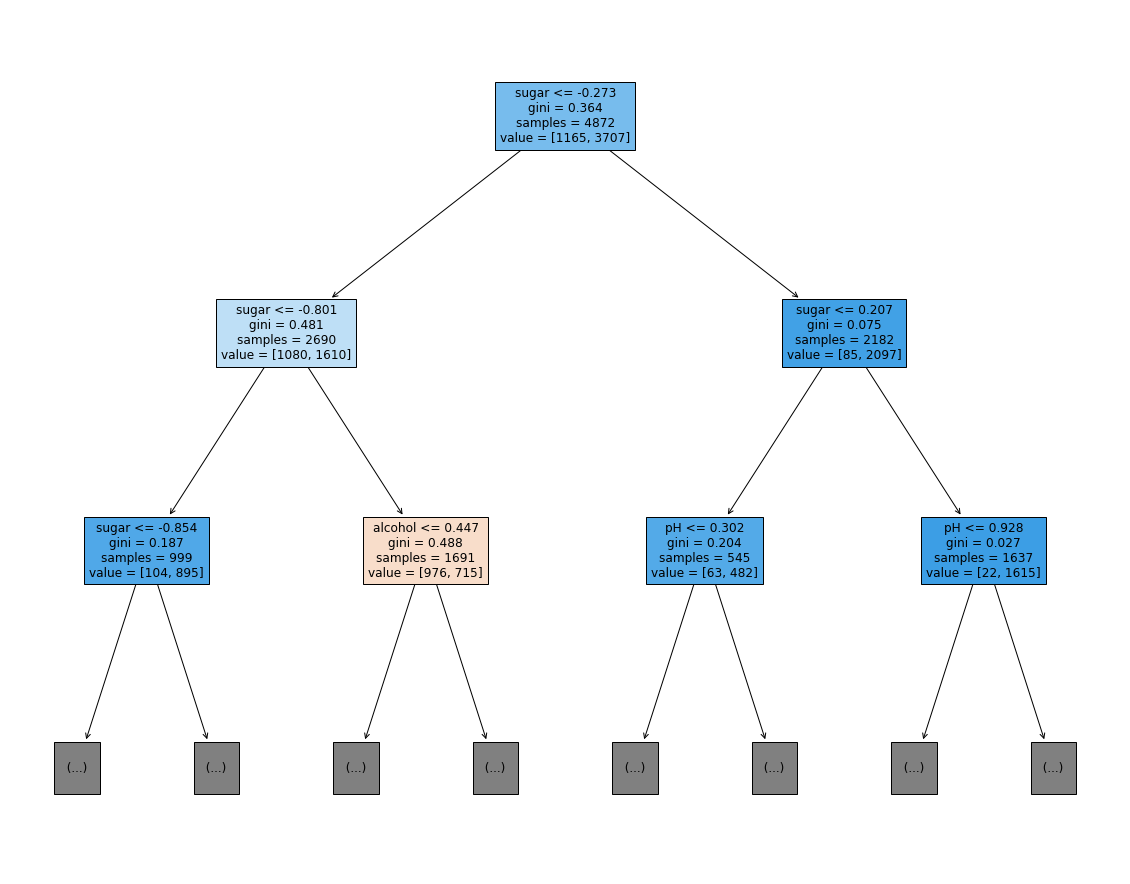

In [79]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,16))
plot_tree(dt_clf, max_depth=2, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()